7.2

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8-white')


In [2]:
Hitters = pd.read_csv('Hitters.csv', header=0, na_values='NA').dropna()
Hitters = Hitters.reset_index(drop=True).drop(['Unnamed: 0'], axis=1)
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']])
y = Hitters['Salary'].values
X_prep = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X_prep, dummies[['League_A', 'Division_E', 'NewLeague_A']]], axis=1).values


In [3]:
X.shape,y.shape

((263, 19), (263,))

In [4]:
X_train, X_test , y_train, y_test = train_test_split(X, y,test_size=0.3)

In [5]:
from sklearn.neural_network import MLPRegressor

In [6]:
mlp = MLPRegressor(hidden_layer_sizes=(50),
                    activation='relu',
                    learning_rate_init=0.008,
                    learning_rate='adaptive')

In [7]:
model = mlp.fit(X_train,y_train)
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

Training set score: 0.800678
Test set score: 0.570166


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
import copy
import numpy as np
import torch
import tqdm
import torch.nn as nn
import torch.optim as optim

In [9]:
model = nn.Sequential(
    nn.Linear(19, 50),
    nn.ReLU(),
    nn.Linear(50, 1)
)

In [10]:
loss_fn = nn.MSELoss() # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
# train-test split of the dataset
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# training parameters
n_epochs = 100  # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf  # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start + batch_size]
            y_batch = y_train[start:start + batch_size]

            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # print progress
            bar.set_postfix(mse=float(loss))

    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)


/tmp/ipython-input-3701090591.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipython-input-3701090591.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
/tmp/ipython-input-3701090591.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
/tmp/ipython-input-3701090591.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach

<All keys matched successfully>

MSE: 75562.62
RMSE: 274.89


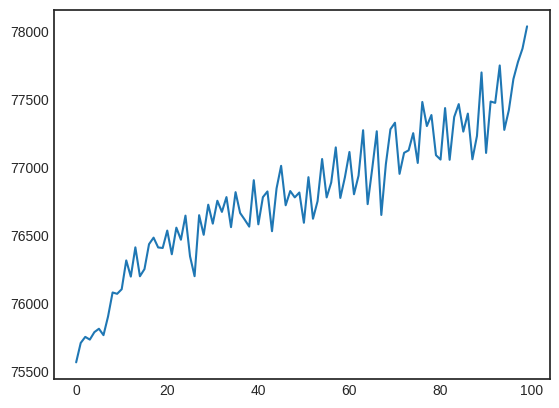

In [17]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
# which is important for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

In [22]:
print("X_train shape= ",X_train.shape)
print("y_train.shape= ",y_train.shape)
print("X_test shape= ",X_test.shape)
print("y_test shape=",y_test.shape)


X_train shape=  (120, 4)
y_train.shape=  (120,)
X_test shape=  (30, 4)
y_test shape= (30,)


In [23]:


mlp = MLPClassifier(
    hidden_layer_sizes=(32),
    activation='relu',
    learning_rate_init=0.01,
    learning_rate='adaptive'
)

model = mlp.fit(X_train, y_train)


In [24]:
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

Training set score: 0.983333
Test set score: 0.933333


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean of Cross validation score:', scores.mean())


Mean of Cross validation score: 0.9800000000000001


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


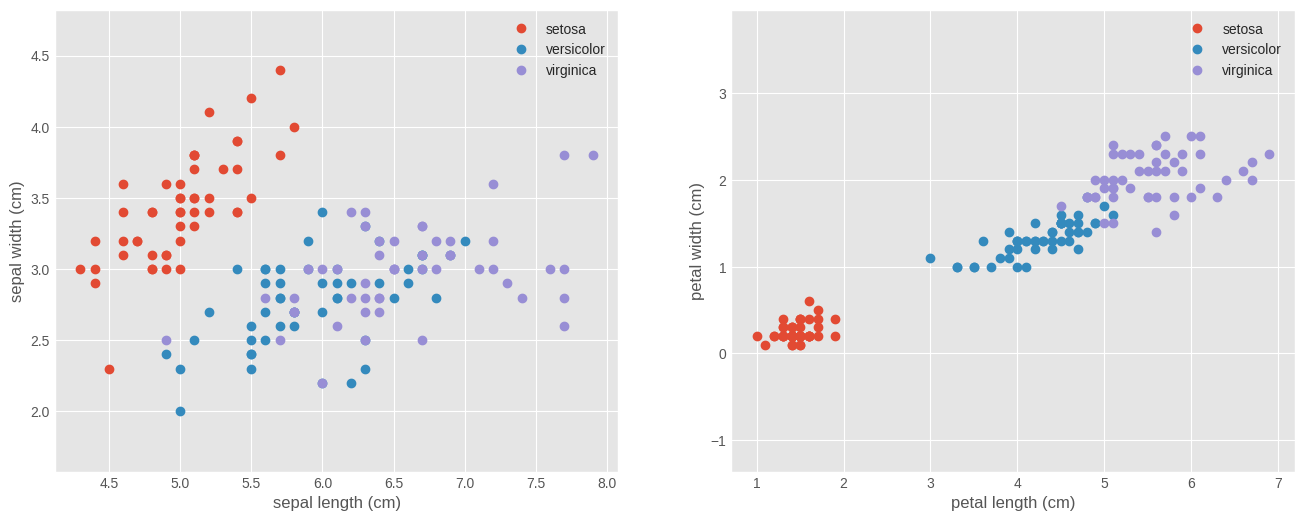

In [28]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)

ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)

ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()


In [29]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [31]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 3)
        # self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        # x = F.relu(self.layer2(x))
        x = F.softmax(self.layer2(x), dim=1)
        return

In [32]:
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model


Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=3, bias=True)
)

100%|██████████| 100/100 [00:00<00:00, 855.09it/s]


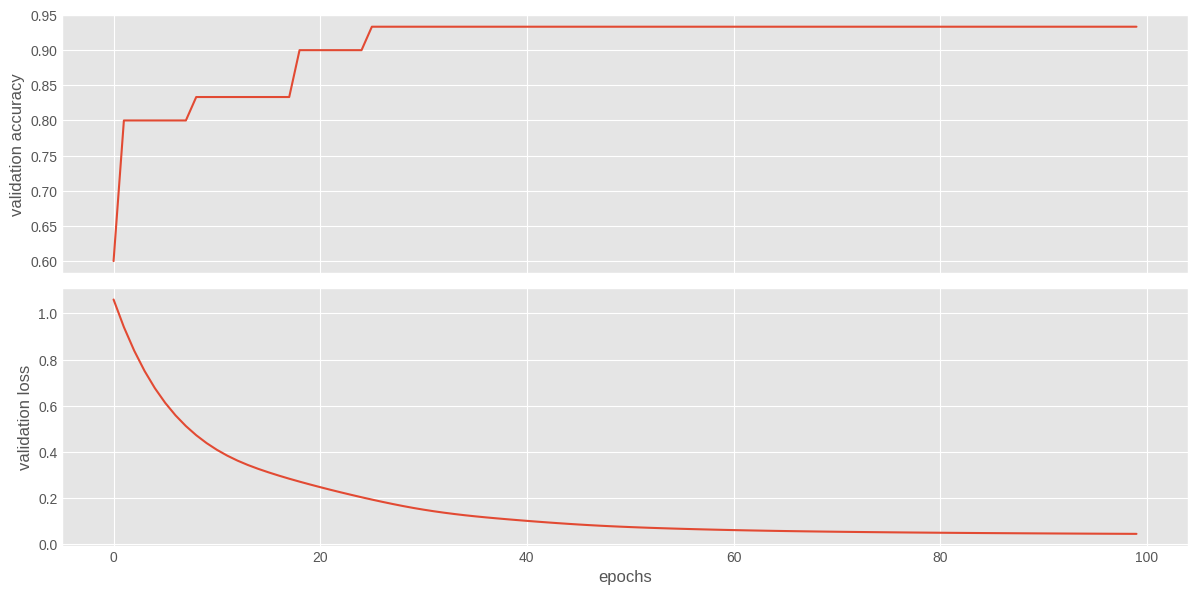

In [47]:

import numpy as np
import tqdm
import matplotlib.pyplot as plt

# Khởi tạo mô hình
input_dim = X_train.shape[1]
model = Model(input_dim)

# Hàm mất mát và bộ tối ưu
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Ép kiểu dữ liệu
X_train = X_train.float()
y_train = y_train.long()
X_test = X_test.float()
y_test = y_test.long()

# Huấn luyện
EPOCHS = 100
loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).float()
        accuracy_list[epoch] = correct.mean().item()

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()


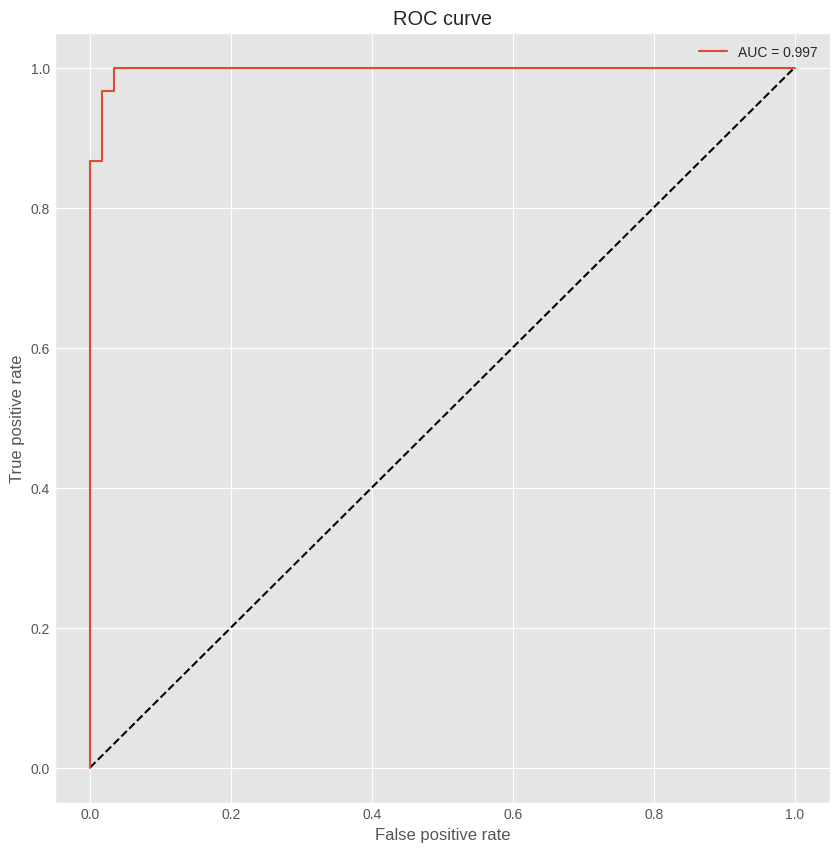

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

with torch.no_grad():
    y_pred = model(X_test).numpy()

fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

7.3

In [50]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8-white')


In [51]:
import pandas as pd

# Đọc dữ liệu và xử lý thiếu
Hitters = pd.read_csv('Hitters.csv', header=0, na_values='NA').dropna()
Hitters = Hitters.reset_index(drop=True).drop(['Unnamed: 0'], axis=1)

# One-hot encoding cho các biến phân loại
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']])

# Biến mục tiêu
y = Hitters.Salary.values

# Tập biến đầu vào
X_prep = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X_prep, dummies[['League_A', 'Division_E', 'NewLeague_A']]], axis=1).values


In [52]:
X.shape,y.shape

((263, 19), (263,))

In [53]:
X_train, X_test , y_train, y_test = train_test_split(X, y,test_size=0.3)

In [54]:
mlp = MLPRegressor(hidden_layer_sizes=(50,30,20),
                  activation='relu',
                  learning_rate_init=0.008,
                  learning_rate='adaptive')

In [55]:
model = mlp.fit(X_train,y_train)
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))


Training set score: 0.856624
Test set score: 0.657622


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
import copy
import numpy as np
import torch
import tqdm
import torch.nn as nn
import torch.optim as optim

In [57]:
model = nn.Sequential(
nn.Linear(19, 50),
nn.ReLU(),
nn.Linear(50, 20),
nn.ReLU(),
nn.Linear(20,1),
nn.ReLU()
)


In [58]:
loss_fn = nn.MSELoss() # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [61]:
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1,1)

In [71]:
import torch
import numpy as np
import tqdm
import copy
import pandas as pd

# Xử lý dữ liệu đầu vào: ép kiểu và chuyển sang Tensor
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float32)
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float32)

y_train = np.array(y_train).ravel().astype(np.float32)
y_test = np.array(y_test).ravel().astype(np.float32)

# Chuyển sang Tensor
X_train = torch.tensor(X_train.values)
y_train = torch.tensor(y_train).reshape(-1, 1)
X_test = torch.tensor(X_test.values)
y_test = torch.tensor(y_test).reshape(-1, 1)

# Thông số huấn luyện
n_epochs = 100
batch_size = 10
batch_start = torch.arange(0, len(X_train), batch_size)

# Biến lưu mô hình tốt nhất
best_mse = np.inf
best_weights = None
history = []

# Vòng lặp huấn luyện
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            start = int(start)
            X_batch = X_train[start:start + batch_size]
            y_batch = y_train[start:start + batch_size]

            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            bar.set_postfix(mse=float(loss))

    # Đánh giá sau mỗi epoch
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test).item()
        history.append(mse)

        if mse < best_mse:
            best_mse = mse
            best_weights = copy.deepcopy(model.state_dict())

# Khôi phục mô hình tốt nhất
model.load_state_dict(best_weights)


<All keys matched successfully>

MSE: 48494.21
RMSE: 220.21


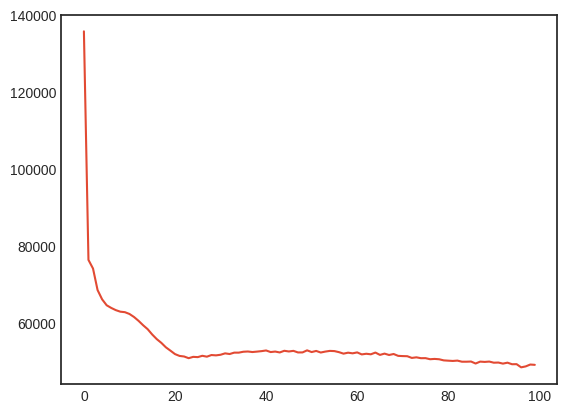

In [72]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

In [75]:


# Load dữ liệu Iris
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Chuẩn hóa dữ liệu (mean = 0, variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)


In [76]:
print("X_train shape= ",X_train.shape)
print("y_train.shape= ",y_train.shape)
print("X_test shape= ",X_test.shape)
print("y_test shape=",y_test.shape)

X_train shape=  (120, 4)
y_train.shape=  (120,)
X_test shape=  (30, 4)
y_test shape= (30,)


In [77]:
mlp = MLPClassifier(hidden_layer_sizes=(8, 18, 8),
                    activation='relu',
                    learning_rate_init=0.01,
                    learning_rate='adaptive')

model = mlp.fit(X_train, y_train)

print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

Training set score: 0.983333
Test set score: 0.966667


In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Mean of Cross validation score:', scores.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean of Cross validation score: 0.9800000000000001


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


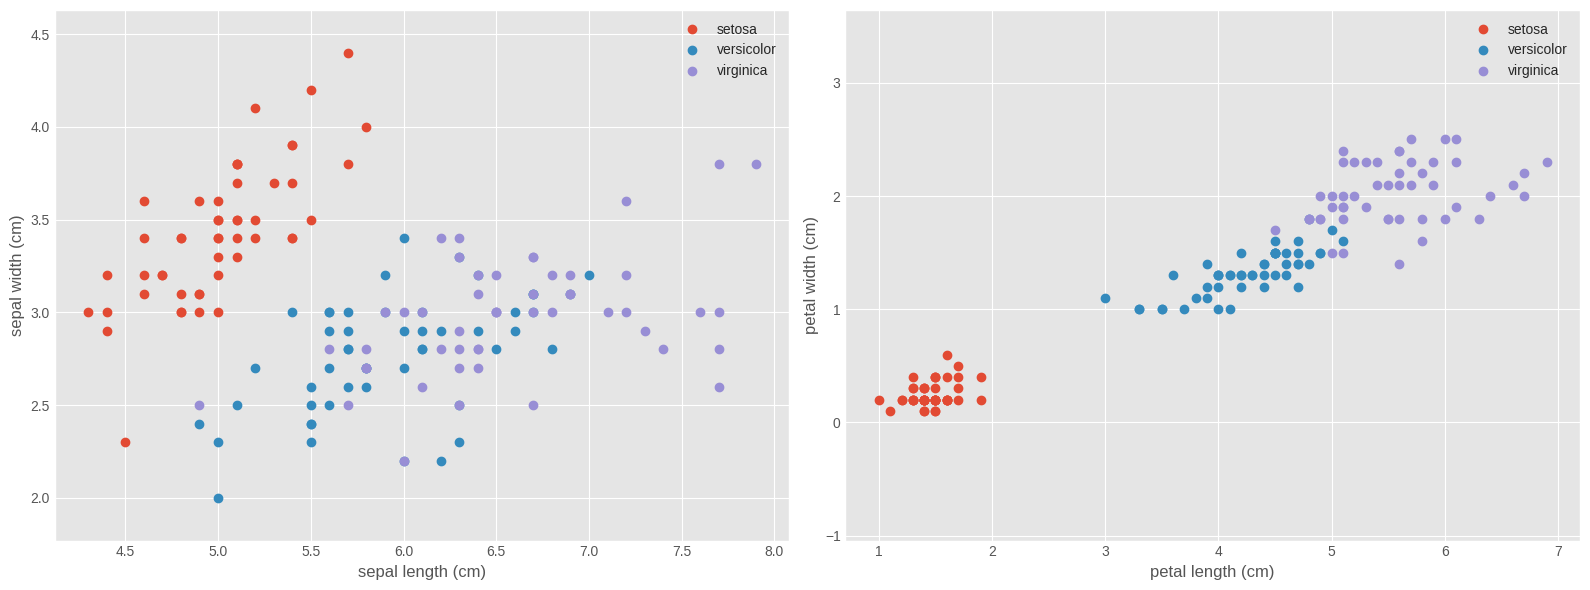

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Vẽ đặc trưng thứ 0 và 1
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Vẽ đặc trưng thứ 2 và 3
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

plt.tight_layout()
plt.show()

In [80]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [82]:


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 3)  # 3 lớp đầu ra cho Iris

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [83]:
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model


Model(
  (layer1): Linear(in_features=4, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=3, bias=True)
)

In [84]:

import tqdm

EPOCHS = 100

# Chuyển dữ liệu sang Tensor và bọc bằng Variable
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    # Forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Đánh giá trên tập test
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).float()
        accuracy_list[epoch] = correct.mean().item()


100%|██████████| 100/100 [00:00<00:00, 188.40it/s]


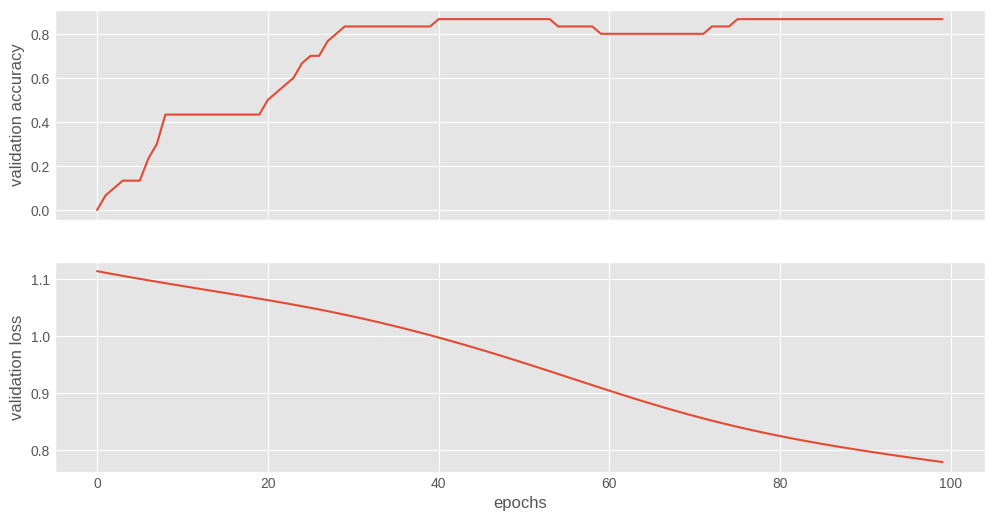

In [85]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

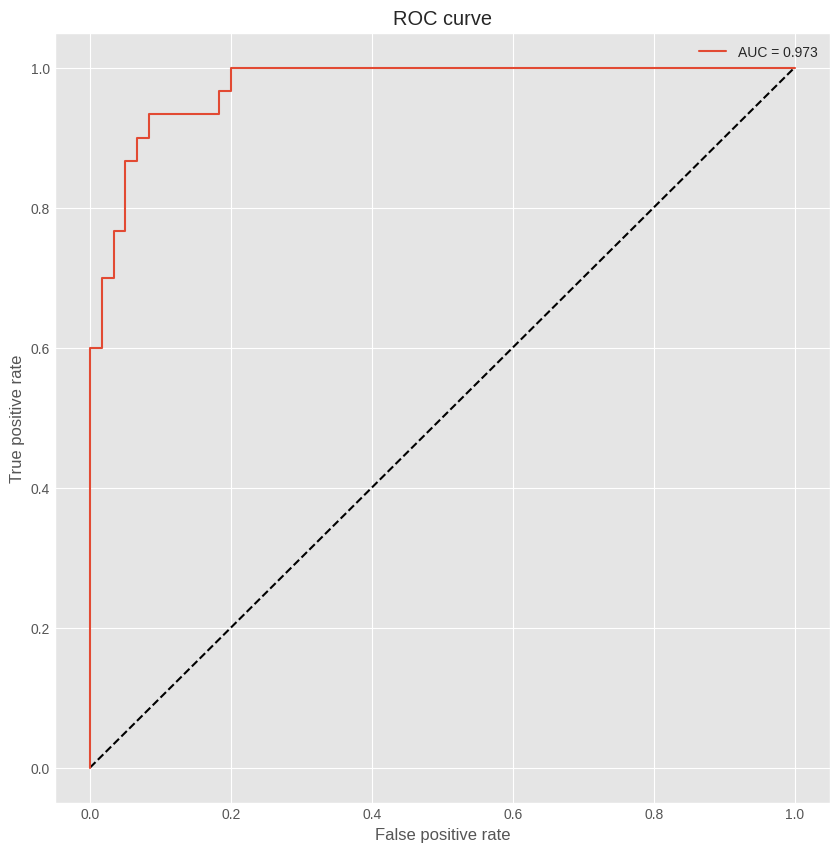

In [86]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# One-hot encoding cho nhãn
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

# Dự đoán xác suất từ mô hình
with torch.no_grad():
    y_pred = model(X_test).numpy()

# Tính ROC và AUC
fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))

# Trang trí biểu đồ
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()
